In [192]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [193]:
#!type weldingroddata.csv # Windows user

In [194]:
df=pd.read_csv('weldingroddata.csv', index_col=0)
df.head(3)
#df.values
#df.dtypes

,Catagories,Product_Type,Product_Description,headings,Industries_WeldingProcess,Elements,Values
Product_ID,,,,,,,
"TIGROD,ER90S-B9",TIG Rods (GTAW),Low Alloy Wires,Tigrod ER90S-B9 is a solid wire for TIG weldin...,"Industries,Welding Process","Pipeline,Power Generation,Process,Petrochemica...","Typical Tensile Properties,Condition,Elongatio...","Stress Relieved,27 %,1275 °F,1 hr,94 ksi,80 ks..."
"TIGROD,ER90S-B3",TIG Rods (GTAW),Low Alloy Wires,Tigrod ER90S-B3 is a Chrome-Moly TIG rod used ...,"Industries,Welding Process","Process,Petrochemical,Power Generation,Welding...","Typical Tensile Properties,Condition,Elongatio...","Stress Relieved,27 %,1275 °F,1 hr,94 ksi,79 ks..."
"TIGROD,ER80S-B8",TIG Rods (GTAW),Low Alloy Wires,ER80S-B8 is a non-copper-coated solid wire for...,"Industries,Welding Process","Power Generation,Welding-GTAW (TIG - Tungsten ...","Typical Tensile Properties,Condition,Elongatio...","Stress Relieved,24 %,1375 °F,1 hr,97 ksi,78 ks..."


In [195]:
df["Values"].iloc[0]

'Stress Relieved,27 %,1275 °F,1 hr,94 ksi,80 ksi,Stress Relieved,25 %,1300 °F,1 hr,93 ksi,76 ksi,0.60 %,< 15 %,0.90 %,0.10 %,max 0.015 %,0.040-0.070 %,30 PPM max %,2.40 %,0.01 %,max 0.10 %,0.01 %,0.030-0.050 %,0.18-0.25 %,0.50 %,max 0.50 %,ASME SFA 5.28; AWS A5.28; ER90S-B9'

In [196]:
df.shape

(630, 7)

In [197]:
group = df.groupby('Catagories')
group.size()

Catagories
Cermic Backup Tape                         1
Covered (Stick) Electrodes (SMAW)        102
Gas Shielded Flux Cored Wires (FCAW)      81
MIG/MAG Wires (GMAW)                      92
Metal Cored Wire (MCAW)                   19
Plasma and Transferred Arc & Arc           3
Repair and Maintenance                   113
Self Shielded Flux Cored Wires (FCAW)     42
Submerged Arc Wires & Fluxes (SAW)       124
TIG Rods (GTAW)                           53
dtype: int64

In [198]:
group = df.groupby('Product_Type')
group.size().head(5)

Product_Type
Accessories         2
All                 1
Alumnium Wires     31
Cast Iron Wires    15
Cladding Fluxes     8
dtype: int64

In [199]:
df['headings'] = df['headings'].fillna('')
df[['headings']].head(3)

,headings
Product_ID,
"TIGROD,ER90S-B9","Industries,Welding Process"
"TIGROD,ER90S-B3","Industries,Welding Process"
"TIGROD,ER80S-B8","Industries,Welding Process"


In [200]:
df['Industries_WeldingProcess'] = df['Industries_WeldingProcess'].fillna('')
df[['Industries_WeldingProcess']].head(3)

,Industries_WeldingProcess
Product_ID,
"TIGROD,ER90S-B9","Pipeline,Power Generation,Process,Petrochemica..."
"TIGROD,ER90S-B3","Process,Petrochemical,Power Generation,Welding..."
"TIGROD,ER80S-B8","Power Generation,Welding-GTAW (TIG - Tungsten ..."


In [201]:
df['Automotive'] = list(map(lambda x: re.findall("Automotive",x), df['Industries_WeldingProcess']))
df['Automotive']=df['Automotive'].apply(''.join)
df[['Automotive']].head(3)
df['Power'] = list(map(lambda x: re.findall("Power",x), df['Industries_WeldingProcess']))
df['Power']=df['Power'].apply(''.join)
df[['Power']].head(3)
df['Petrochemical'] = list(map(lambda x: re.findall("Petrochemical",x), df['Industries_WeldingProcess']))
df['Petrochemical']=df['Petrochemical'].apply(''.join)
df[['Petrochemical']].head(3)
df['Construction'] = list(map(lambda x: re.findall("Construction",x), df['Industries_WeldingProcess']))
df['Construction']=df['Construction'].apply(''.join)
df[['Construction']].head(3)
df['Ship'] = list(map(lambda x: re.findall("Ship",x), df['Industries_WeldingProcess']))
df['Ship']=df['Ship'].apply(''.join)
df[['Ship']].head(3)
df['Pipeline'] = list(map(lambda x: re.findall("Pipeline",x), df['Industries_WeldingProcess']))
df['Pipeline']=df['Pipeline'].apply(''.join)
df[['Pipeline']].head(3)

,Pipeline
Product_ID,
"TIGROD,ER90S-B9",Pipeline
"TIGROD,ER90S-B3",
"TIGROD,ER80S-B8",


In [202]:
df['Values_Condition'] = df['Values'].fillna('')
df[['Values_Condition']].head(3)

df['Values_Condition'] = list(map(lambda x: re.findall("Stress Relieved",x), df['Values_Condition']))
df['Values_Condition']=df['Values_Condition'].apply(''.join)
df[['Values_Condition']].head(3)

df['Values_Condition']=df["Values_Condition"].apply(lambda lst: lst[:15])
df[['Values_Condition']].head(3)

,Values_Condition
Product_ID,
"TIGROD,ER90S-B9",Stress Relieved
"TIGROD,ER90S-B3",Stress Relieved
"TIGROD,ER80S-B8",Stress Relieved


In [203]:
df['Tensile'] = df['Values'].fillna('')
df[['Tensile']].head(3)

,Tensile
Product_ID,
"TIGROD,ER90S-B9","Stress Relieved,27 %,1275 °F,1 hr,94 ksi,80 ks..."
"TIGROD,ER90S-B3","Stress Relieved,27 %,1275 °F,1 hr,94 ksi,79 ks..."
"TIGROD,ER80S-B8","Stress Relieved,24 %,1375 °F,1 hr,97 ksi,78 ks..."


In [204]:
df['Elements'] = df['Elements'].fillna('')
df[['Elements']].head(3)

,Elements
Product_ID,
"TIGROD,ER90S-B9","Typical Tensile Properties,Condition,Elongatio..."
"TIGROD,ER90S-B3","Typical Tensile Properties,Condition,Elongatio..."
"TIGROD,ER80S-B8","Typical Tensile Properties,Condition,Elongatio..."


In [205]:
df['Tensile'] = list(map(lambda x: re.findall("[0-9]{0,3} ksi",x), df['Tensile']))

In [206]:
df['Tensile']=df["Tensile"].apply(lambda lst: lst[:1])
df[['Tensile']].head(3)

,Tensile
Product_ID,
"TIGROD,ER90S-B9",[94 ksi]
"TIGROD,ER90S-B3",[94 ksi]
"TIGROD,ER80S-B8",[97 ksi]


In [207]:
df['Tensile']=df['Tensile'].apply(''.join)
df['Tensile']=df["Tensile"].apply(lambda x:re.findall("[0-9]{0,3}",x)[0])
df['Tensile']=pd.to_numeric(df['Tensile'])
df['Tensile'].head(3)

Product_ID
TIGROD,ER90S-B9    94.0
TIGROD,ER90S-B3    94.0
TIGROD,ER80S-B8    97.0
Name: Tensile, dtype: float64

In [208]:
df_new=df[['Catagories','Product_Type','Power','Automotive','Petrochemical','Construction','Ship','Pipeline','Tensile','Values_Condition']]
df_new.head(3)

,Catagories,Product_Type,Power,Automotive,Petrochemical,Construction,Ship,Pipeline,Tensile,Values_Condition
Product_ID,,,,,,,,,,
"TIGROD,ER90S-B9",TIG Rods (GTAW),Low Alloy Wires,Power,,Petrochemical,,,Pipeline,94.0,Stress Relieved
"TIGROD,ER90S-B3",TIG Rods (GTAW),Low Alloy Wires,Power,,Petrochemical,,,,94.0,Stress Relieved
"TIGROD,ER80S-B8",TIG Rods (GTAW),Low Alloy Wires,Power,,,,,,97.0,Stress Relieved


In [209]:
df_new=df_new.fillna(0)
df_new.head(3)

,Catagories,Product_Type,Power,Automotive,Petrochemical,Construction,Ship,Pipeline,Tensile,Values_Condition
Product_ID,,,,,,,,,,
"TIGROD,ER90S-B9",TIG Rods (GTAW),Low Alloy Wires,Power,,Petrochemical,,,Pipeline,94.0,Stress Relieved
"TIGROD,ER90S-B3",TIG Rods (GTAW),Low Alloy Wires,Power,,Petrochemical,,,,94.0,Stress Relieved
"TIGROD,ER80S-B8",TIG Rods (GTAW),Low Alloy Wires,Power,,,,,,97.0,Stress Relieved


In [211]:
df_new.describe(include='all')

,Catagories,Product_Type,Power,Automotive,Petrochemical,Construction,Ship,Pipeline,Tensile,Values_Condition
count,630,630,630,630,630,630,630,630,630.000000,630
unique,10,28,2,2,2,3,3,2,NaN,2
top,Submerged Arc Wires & Fluxes (SAW),Hardfacing Alloys,,,,,,,NaN,
freq,124,157,594,602,603,577,561,593,NaN,582
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.496825,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.243870,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.000000,NaN


Text(0.5,1,'Histogram of Tensile Strength')

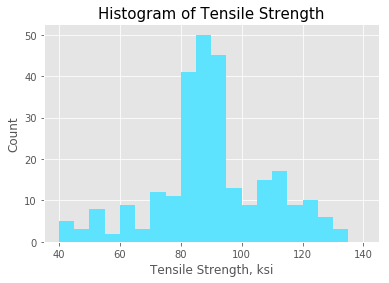

In [212]:
plt.hist(df_new['Tensile'], bins=20, range=(40,140),color="#5ee3ff")
plt.ylabel('Count')
plt.xlabel('Tensile Strength, ksi')
plt.title('Histogram of Tensile Strength', fontsize=15)

In [213]:
temp1=df_new[df_new["Catagories"]=="TIG Rods (GTAW)"].copy()
#temp1

Text(0.5,1,'GTAW -- Low Alloy Steel -- >90 ksi')

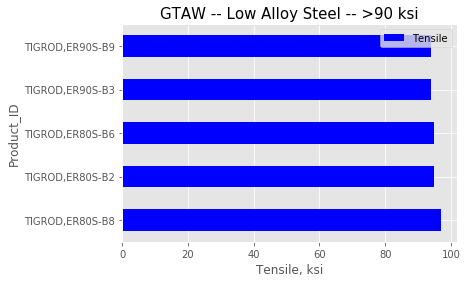

In [214]:
dg =temp1[temp1["Product_Type"]=='Low Alloy Wires']
dg = dg.groupby('Product_ID').agg({'Tensile':'mean'})
dg[dg.Tensile>90].sort_values(ascending=False, by='Tensile').plot(kind='barh',y='Tensile', color='b')
plt.xlabel('Tensile, ksi')
plt.ylabel('Product_ID')
plt.title('GTAW -- Low Alloy Steel -- >90 ksi', fontsize=15)

Text(0.5,1,'Number of Product_Type')

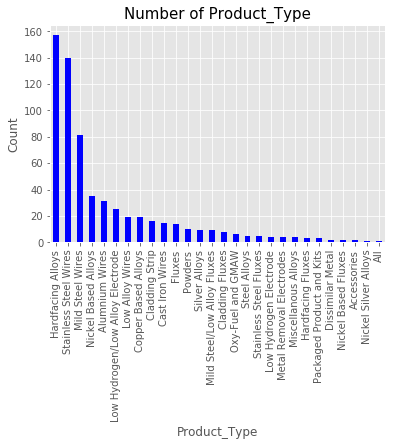

In [215]:

df_new1=df_new.groupby('Product_Type')['Ship'].count().sort_values(ascending=False).plot.bar(color='b')
plt.xlabel('Product_Type')
plt.ylabel('Count')
plt.title('Number of Product_Type', fontsize=15)

Text(0.5,1,'Number of Product_Type in each Process Type')

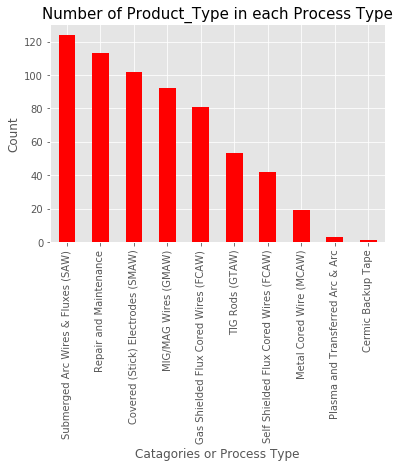

In [224]:
df_new.groupby(['Catagories'])['Product_Type'].count().sort_values(ascending=False).plot.bar(color='r')
plt.xlabel('Catagories or Process Type')
plt.ylabel('Count')
plt.title('Number of Product_Type in each Process Type', fontsize=15)

Text(0,0.5,'Tensile_Strength, ksi')

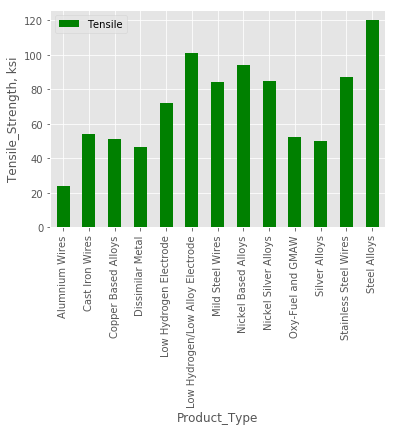

In [229]:
temp=df_new[['Product_Type','Tensile']].groupby('Product_Type').median()
temp[temp['Tensile']>20].plot.bar(color="g")

plt.xlabel('Product_Type')
plt.ylabel('Tensile_Strength, ksi')


In [228]:
#df_score = df_new[['Catagories', 'Tensile']]
#df_score.boxplot(by='Catagories', column='Tensile')

#plt.xlabel('Electrode Catagories')
#plt.ylabel('Tensile_Strength, ksi')
#plt.title('Boxplot grouped by Catagories', fontsize=15)
#plt.xticks(rotation=90)